In [1]:
!pip install tensorflow

In [3]:
import pandas as pd
import numpy as nd
import os
import shutil
from PIL import Image
from urllib.request import urlretrieve
import matplotlib.pyplot as plt
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from matplotlib.ticker import FormatStrFormatter

In [4]:
data = pd.read_csv("D:/ML/Projects/Deep-learning - projects/X-ray/medical-ai-main/labels.csv")

In [5]:
data.head(2)

,filename,height,width,label,xmin,ymin,xmax,ymax,view
0,00013118_008.jpg,2992,2991,Atelectasis,225.0,547.0,311.0,626.0,PA
1,00014716_007.jpg,3056,2544,Atelectasis,686.0,131.0,871.0,444.0,AP


In [6]:
finding = "cardiomegaly"
finding.capitalize()

'Cardiomegaly'

In [7]:
positive = data.loc[data["label"]  == "Cardiomegaly"]
negative =  data.loc[data["label"]  == "No Finding"]
n= len(positive)
print("positive-{}".format(n))
if n == 0:
    print("Check your spelling")

positive-146


In [8]:
TRAIN = 0.8
TEST = 0.2
TRAIN_N = int(n*TRAIN)
TEST_N = int(n*TEST)
print('TRAIN_N {} ,TEST_N {} '.format(TRAIN_N,TEST_N) )

TRAIN_N 116 ,TEST_N 29 


In [9]:
train_labels = pd.concat([positive[:TRAIN_N], negative[:TRAIN_N]])
test_labels = pd.concat([positive[TRAIN_N:], negative[TRAIN_N:n]])

In [10]:
os.makedirs(finding+"/test/positive",  exist_ok=True)
os.makedirs(finding+"/test/negative",  exist_ok=True)
os.makedirs(finding+"/train/positive", exist_ok=True)
os.makedirs(finding+"/train/negative", exist_ok=True)

In [11]:
# Define the source and destination directories
source_dir = "D:/ML/Projects/Deep-learning - projects/X-ray/medical-ai-main/images"
positive_train_images = os.path.join(finding, "train", "positive")
positive_test_images = os.path.join(finding, "test", "positive")
negative_train_images = os.path.join(finding, "train", "negative")
negative_test_images = os.path.join(finding, "test", "negative")

# Create the destination directories if they don't exist
os.makedirs(positive_train_images, exist_ok=True)
os.makedirs(positive_test_images, exist_ok=True)
os.makedirs(negative_train_images, exist_ok=True)
os.makedirs(negative_test_images, exist_ok=True)


# Iterate through the positive DataFrame and copy files
for idx, image in positive[:TRAIN_N].iterrows():
    source_file = os.path.join(source_dir, image["filename"])
    destination_file = os.path.join(positive_train_images, image["filename"])
    
    try:
        shutil.copyfile(source_file, destination_file)
        print(f"Successfully copied: {source_file} -> {destination_file}")
    except FileNotFoundError:
        print(f"File not found: {source_file}")
    except Exception as e:
        print(f"An error occurred: {e}")
        

for idx, image in positive[TRAIN_N:].iterrows():
    source_file = os.path.join(source_dir, image["filename"])
    destination_file = os.path.join(positive_test_images, image["filename"])
    
    try:
        shutil.copyfile(source_file, destination_file)
        print(f"Successfully copied: {source_file} -> {destination_file}")
    except FileNotFoundError:
        print(f"File not found: {source_file}")
    except Exception as e:
        print(f"An error occurred: {e}")
        
for idx, image in negative[TRAIN_N:n].iterrows():
    source_file = os.path.join(source_dir, image["filename"])
    destination_file = os.path.join(negative_test_images, image["filename"])
    
    try:
        shutil.copyfile(source_file, destination_file)
        print(f"Successfully copied: {source_file} -> {destination_file}")
    except FileNotFoundError:
        print(f"File not found: {source_file}")
    except Exception as e:
        print(f"An error occurred: {e}")
        
for idx, image in negative[:TRAIN_N].iterrows():
    source_file = os.path.join(source_dir, image["filename"])
    destination_file = os.path.join(negative_train_images, image["filename"])
    
    try:
        shutil.copyfile(source_file, destination_file)
        print(f"Successfully copied: {source_file} -> {destination_file}")
    except FileNotFoundError:
        print(f"File not found: {source_file}")
    except Exception as e:
        print(f"An error occurred: {e}")

Successfully copied: D:/ML/Projects/Deep-learning - projects/X-ray/medical-ai-main/images\00005066_030.jpg -> cardiomegaly\train\positive\00005066_030.jpg
Successfully copied: D:/ML/Projects/Deep-learning - projects/X-ray/medical-ai-main/images\00009608_024.jpg -> cardiomegaly\train\positive\00009608_024.jpg
Successfully copied: D:/ML/Projects/Deep-learning - projects/X-ray/medical-ai-main/images\00000661_000.jpg -> cardiomegaly\train\positive\00000661_000.jpg
Successfully copied: D:/ML/Projects/Deep-learning - projects/X-ray/medical-ai-main/images\00019018_007.jpg -> cardiomegaly\train\positive\00019018_007.jpg
Successfully copied: D:/ML/Projects/Deep-learning - projects/X-ray/medical-ai-main/images\00000211_041.jpg -> cardiomegaly\train\positive\00000211_041.jpg
Successfully copied: D:/ML/Projects/Deep-learning - projects/X-ray/medical-ai-main/images\00015770_010.jpg -> cardiomegaly\train\positive\00015770_010.jpg
Successfully copied: D:/ML/Projects/Deep-learning - projects/X-ray/med

Successfully copied: D:/ML/Projects/Deep-learning - projects/X-ray/medical-ai-main/images\00022215_012.jpg -> cardiomegaly\train\positive\00022215_012.jpg
Successfully copied: D:/ML/Projects/Deep-learning - projects/X-ray/medical-ai-main/images\00017524_028.jpg -> cardiomegaly\train\positive\00017524_028.jpg
Successfully copied: D:/ML/Projects/Deep-learning - projects/X-ray/medical-ai-main/images\00005827_000.jpg -> cardiomegaly\train\positive\00005827_000.jpg
Successfully copied: D:/ML/Projects/Deep-learning - projects/X-ray/medical-ai-main/images\00001534_005.jpg -> cardiomegaly\train\positive\00001534_005.jpg
Successfully copied: D:/ML/Projects/Deep-learning - projects/X-ray/medical-ai-main/images\00004344_022.jpg -> cardiomegaly\train\positive\00004344_022.jpg
Successfully copied: D:/ML/Projects/Deep-learning - projects/X-ray/medical-ai-main/images\00020819_002.jpg -> cardiomegaly\train\positive\00020819_002.jpg
Successfully copied: D:/ML/Projects/Deep-learning - projects/X-ray/med

Successfully copied: D:/ML/Projects/Deep-learning - projects/X-ray/medical-ai-main/images\00000756_001.jpg -> cardiomegaly\test\positive\00000756_001.jpg
Successfully copied: D:/ML/Projects/Deep-learning - projects/X-ray/medical-ai-main/images\00008522_032.jpg -> cardiomegaly\test\positive\00008522_032.jpg
Successfully copied: D:/ML/Projects/Deep-learning - projects/X-ray/medical-ai-main/images\00005532_000.jpg -> cardiomegaly\test\positive\00005532_000.jpg
Successfully copied: D:/ML/Projects/Deep-learning - projects/X-ray/medical-ai-main/images\00030206_013.jpg -> cardiomegaly\test\positive\00030206_013.jpg
Successfully copied: D:/ML/Projects/Deep-learning - projects/X-ray/medical-ai-main/images\00008399_007.jpg -> cardiomegaly\test\positive\00008399_007.jpg
Successfully copied: D:/ML/Projects/Deep-learning - projects/X-ray/medical-ai-main/images\00012686_003.jpg -> cardiomegaly\test\positive\00012686_003.jpg
Successfully copied: D:/ML/Projects/Deep-learning - projects/X-ray/medical-a

Successfully copied: D:/ML/Projects/Deep-learning - projects/X-ray/medical-ai-main/images\00000039_002.jpg -> cardiomegaly\train\negative\00000039_002.jpg
Successfully copied: D:/ML/Projects/Deep-learning - projects/X-ray/medical-ai-main/images\00000039_003.jpg -> cardiomegaly\train\negative\00000039_003.jpg
Successfully copied: D:/ML/Projects/Deep-learning - projects/X-ray/medical-ai-main/images\00000040_000.jpg -> cardiomegaly\train\negative\00000040_000.jpg
Successfully copied: D:/ML/Projects/Deep-learning - projects/X-ray/medical-ai-main/images\00000040_002.jpg -> cardiomegaly\train\negative\00000040_002.jpg
Successfully copied: D:/ML/Projects/Deep-learning - projects/X-ray/medical-ai-main/images\00000041_003.jpg -> cardiomegaly\train\negative\00000041_003.jpg
Successfully copied: D:/ML/Projects/Deep-learning - projects/X-ray/medical-ai-main/images\00000041_004.jpg -> cardiomegaly\train\negative\00000041_004.jpg
Successfully copied: D:/ML/Projects/Deep-learning - projects/X-ray/med

In [12]:
def load_image_into_numpy_array(image):
    image = image.convert('RGB')
    (im_width, im_height) = image.size
    return nd.array(image.getdata()).reshape(
        (im_height, im_width, 3)).astype(nd.uint8)

In [13]:
import os
from PIL import Image

source_dir = 'D:/ML/Projects/Deep-learning - projects/X-ray/medical-ai-main/images'
positive_images = []
negative_images = []
IMAGE_HEIGHT = 256
IMAGE_WIDTH = 256

for index, row in positive[:6].iterrows():
    image_path = os.path.join(source_dir, row['filename'])  
    image = Image.open(image_path).resize((IMAGE_WIDTH, IMAGE_HEIGHT))
    positive_images.append(load_image_into_numpy_array(image))
    
for index, row in negative[:6].iterrows():
    image_path = os.path.join(source_dir, row['filename'])  
    image = Image.open(image_path).resize((IMAGE_WIDTH, IMAGE_HEIGHT))
    negative_images.append(load_image_into_numpy_array(image))

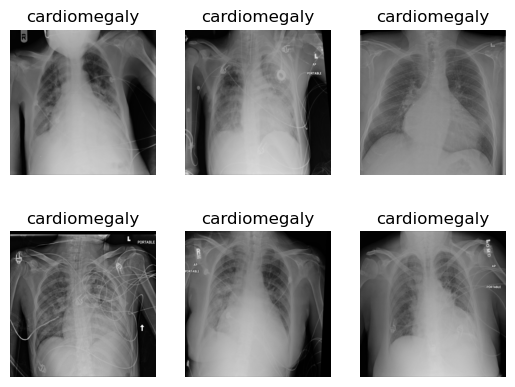

In [14]:
for i,img in enumerate(positive_images[:6]):
    plt.subplot(2,3,i+1)
    plt.imshow(positive_images[i]);
    plt.title("cardiomegaly")
    plt.axis('off')
plt.show();

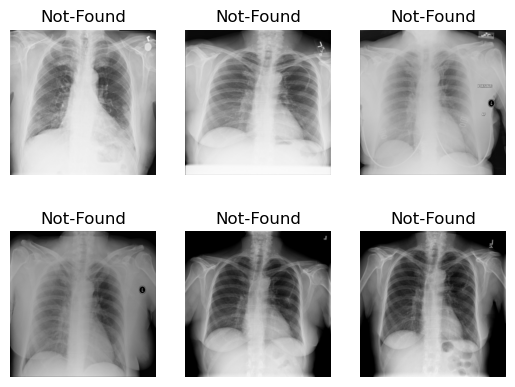

In [15]:
for i,img in enumerate(negative_images[:6]):
    plt.subplot(2,3,i+1)
    plt.title("Not-Found")
    plt.imshow(negative_images[i])
    plt.axis('off')
plt.show()

In [16]:
pre_train_model = InceptionV3(input_shape = (IMAGE_HEIGHT,IMAGE_WIDTH,3),weights='imagenet',include_top=False)

for layer in pre_train_model.layers:
    layer.trainable = False

last_layer = pre_train_model.get_layer('mixed7')
last_output = last_layer.output

x = layers.Flatten()(last_output)
x = layers.Dense(1024,activation="relu")(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(1, activation="sigmoid")(x)

model = Model(pre_train_model.input , x)
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])

In [17]:
rootdir = "D:/ML/Projects/Deep-learning - projects/X-ray/cardiomegaly"
source_dir = 'D:/ML/Projects/Deep-learning - projects/X-ray/medical-ai-main/images'
base_direc = rootdir 

train_dir = os.path.join(base_direc,'train')
test_dir = os.path.join(base_direc,'test')

train_pos_dir = os.path.join(train_dir,'positive')
train_neg_dir = os.path.join(train_dir,'negative')
test_pos_dir = os.path.join(test_dir,'positive')
test_neg_dir = os.path.join(test_dir,'negative')

In [18]:

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False)


val_datagen = ImageDataGenerator(rescale=1./255)

In [19]:
train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
        batch_size=1,
        class_mode='binary')

test_generator = val_datagen.flow_from_directory(
        test_dir,
        target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
        batch_size=1,
        class_mode='binary')

Found 232 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [20]:
train_steps = len(os.listdir(train_pos_dir))*2
test_steps = len(os.listdir(test_pos_dir)) * 2
print("train_steps {} , test_steps {}".format(train_steps,test_steps))

train_steps 232 , test_steps 60


In [21]:
history = model.fit(
      train_generator,
      steps_per_epoch=train_steps,
      validation_data=test_generator,
      validation_steps=test_steps,
      epochs=5,
      verbose=2)

Epoch 1/5
232/232 - 611s - loss: 7.4238 - acc: 0.5345 - val_loss: 1.9892 - val_acc: 0.6000 - 611s/epoch - 3s/step
Epoch 2/5
232/232 - 585s - loss: 1.8206 - acc: 0.6164 - val_loss: 1.2338 - val_acc: 0.5500 - 585s/epoch - 3s/step
Epoch 3/5
232/232 - 569s - loss: 0.8226 - acc: 0.6595 - val_loss: 0.4984 - val_acc: 0.7500 - 569s/epoch - 2s/step
Epoch 4/5
232/232 - 555s - loss: 0.6289 - acc: 0.7069 - val_loss: 0.5393 - val_acc: 0.7333 - 555s/epoch - 2s/step
Epoch 5/5
232/232 - 583s - loss: 0.5472 - acc: 0.7328 - val_loss: 0.5565 - val_acc: 0.6833 - 583s/epoch - 3s/step


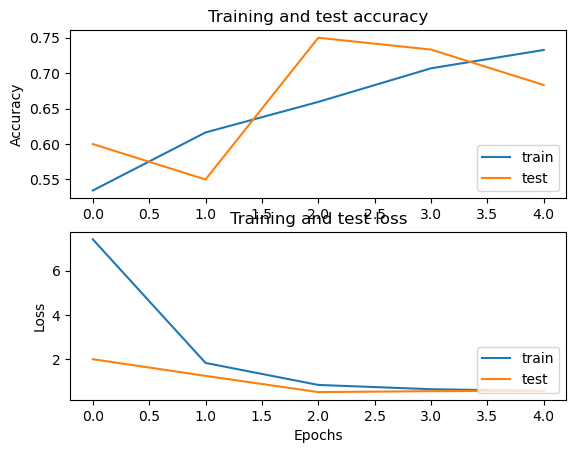

In [22]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.subplot(2,1,1)
plt.plot(epochs, acc, label="train")
plt.plot(epochs, val_acc, label="test")
plt.ylabel("Accuracy")
plt.title('Training and test accuracy')
plt.legend(loc="lower right")

plt.subplot(2,1,2)
plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="test")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title('Training and test loss')
plt.legend(loc="lower right")
plt.show()

In [23]:
def predict_image(filename):
    image = Image.open(filename).resize((IMAGE_HEIGHT,IMAGE_WIDTH))
    image_np = load_image_into_numpy_array(image)
    exp = nd.true_divide(image_np , 255.0)
    expand = nd.expand_dims(exp,axis=0)
    return model.predict(expand)[0][0]

def show_df_row(row):
    image_path = row["filepath"]
    image = Image.open(image_path).resize((IMAGE_WIDTH, IMAGE_HEIGHT))
    img = load_image_into_numpy_array(image)
    exp = nd.true_divide(img, 255.0)
    expanded = nd.expand_dims(exp, axis=0)
    pred = model.predict(expanded)[0][0]
    guess = "cardiomegaly-negative"
    if pred > 0.5:
        guess = "cardiomegaly-positive"
    title = "Image: "+row["filename"]+" Label: "+row["label"]+" Guess: "+guess+" Score: "+str(pred)
    plt.title(title)
    plt.imshow(img)
    plt.show()
    return

In [24]:
result = []
for image in os.listdir(test_pos_dir):
    filename = test_pos_dir+"/"+image
    prediction = predict_image(filename)
    guess = "cardiomegaly-positive" if prediction > 0.5 else "cardiomegaly-negative"
    result.append([filename,image,"cardiomegaly-positive",guess,prediction])
    
for image in os.listdir(test_neg_dir):
    filename = test_neg_dir+"/"+image
    prediction = predict_image(filename)
    guess = "cardiomegaly-postive" if prediction > 0.5 else "cardiomegaly-negative"
    result.append([filename,image,"cardiomegaly-negative",guess,prediction])
    
sorted_results = sorted(result, key=lambda x: x[4], reverse=True)
df = pd.DataFrame(data=sorted_results, columns=["filepath","filename","label","guess","prediction"])

print("Done the prediction")

1/1 [==============================] - 0s 255ms/step
Done the prediction


In [25]:
df.to_csv("D:/ML/Projects/Deep-learning - projects/X-ray/predic_cardiomegaly.csv")

1/1 [==============================] - 0s 231ms/step


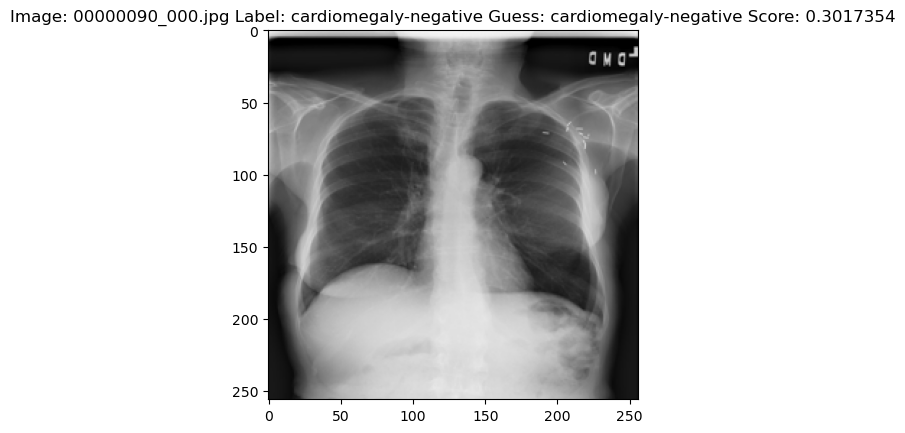

In [26]:
import random
n = random.randint(0, len(df)-1)
show_df_row(df.iloc[n])

In [27]:
df[::5][['filename', 'label',"guess","prediction"]]

,filename,label,guess,prediction
0,00013615_052.jpg,cardiomegaly-positive,cardiomegaly-positive,0.995397
5,00030206_013.jpg,cardiomegaly-positive,cardiomegaly-positive,0.937941
10,00015304_001.jpg,cardiomegaly-positive,cardiomegaly-positive,0.899788
15,00004822_051.jpg,cardiomegaly-positive,cardiomegaly-positive,0.845307
20,00004342_023.jpg,cardiomegaly-positive,cardiomegaly-positive,0.779322
25,00000090_006.jpg,cardiomegaly-negative,cardiomegaly-postive,0.720222
30,00000094_000.jpg,cardiomegaly-negative,cardiomegaly-postive,0.654744
35,00000090_007.jpg,cardiomegaly-negative,cardiomegaly-postive,0.573869
40,00000078_000.jpg,cardiomegaly-negative,cardiomegaly-negative,0.443090
45,00000090_010.jpg,cardiomegaly-negative,cardiomegaly-negative,0.369032


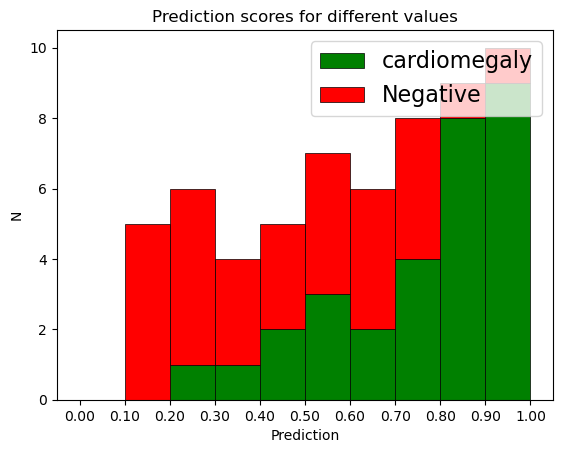

In [31]:
pos = df.loc[df['label'] == "cardiomegaly-positive"]["prediction"]
neg = df.loc[df["label"] == "cardiomegaly-negative"]["prediction"]

fig,ax = plt.subplots()
n, bins, patches = plt.hist([pos,neg], nd.arange(0.0, 1.1, 0.1).tolist(), edgecolor='black', linewidth=0.5, density=False, histtype='bar', stacked=True, color=['green', 'red'], label=[finding, 'Negative'])
plt.xlabel('Prediction')
plt.ylabel('N')
plt.xticks(bins)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.title('Prediction scores for different values')
plt.legend(loc="upper right", fontsize=16)
plt.show()